In [33]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist

A06.1 - Exponential Random Graph Models

Task: For the World Trade Web dataset, fit different ERGM-based Configuration Models and compare basic network metrics with null models

For each of the WTW networks provided:

+ measure the average clustering and reciprocity coefficients

+ fit the Undirected Binary CM and Directed Binary CM

+ sample 30 networks from the obtained distributions and measure clustering and reciprocity. Calculate average and standard error on each measure

+ plot clustering and reciprocity as functions of time, comparing the real value with the average and error bars from samples

In [34]:
# Load Data
year_load = 1992
graphs = []

while year_load < 2003:
    file_name = "data/World_Trade_Web/WDN_"+str(year_load)+".txt.graphml"
    graph = nx.read_graphml(file_name)
    graphs.append(graph)
    year_load = year_load + 1

print(str(len(graphs)) + " datasets have been loaded")

11 datasets have been loaded


In [35]:
#Step 1: Average clustering and reciprocity
year_load = 1992
ave_clust = []
reci_coe = []

for graph in graphs:
    print("-------------Year of " + str(year_load) + "-------------")
    ave_clust.append(nx.average_clustering(graph))
    print("Average clustering: " + str(nx.average_clustering(graph)))
    reci_coe.append(nx.reciprocity(graph))
    print("Reciprocity coefficients: " + str(nx.reciprocity(graph)))
    year_load = year_load + 1


-------------Year of 1992-------------
Average clustering: 0.8021364732946835
Reciprocity coefficients: 0.367340010185028
-------------Year of 1993-------------
Average clustering: 0.7826552252417198
Reciprocity coefficients: 0.430931744312026
-------------Year of 1994-------------
Average clustering: 0.778118724128831
Reciprocity coefficients: 0.541138903672166
-------------Year of 1995-------------
Average clustering: 0.769316598518603
Reciprocity coefficients: 0.6043664931031333
-------------Year of 1996-------------
Average clustering: 0.779859983253989
Reciprocity coefficients: 0.6482433229421182
-------------Year of 1997-------------
Average clustering: 0.7844618494148852
Reciprocity coefficients: 0.6822429906542056
-------------Year of 1998-------------
Average clustering: 0.7913458153848136
Reciprocity coefficients: 0.7015887290167866
-------------Year of 1999-------------
Average clustering: 0.7946922756897296
Reciprocity coefficients: 0.716582186821144
-------------Year of 20

In [36]:
#+ Step 2 & 3:
year_load = 1992
def clust_reci(typ):
    clust = []
    reci = []

    for i in range(30):
        if typ == "ubcm":
            edgelist_ens = np.loadtxt(f"ubcm_sample/{i}.txt")
            net = nx.Graph()
        else:
            edgelist_ens = np.loadtxt(f"dbcm_sample/{i}.txt")
            net = nx.DiGraph()

        net.add_edges_from(edgelist_ens)
        clust.append(nx.average_clustering(net))
        
        if typ == "dbcm":
            reci.append(nx.reciprocity(net))
    
    return clust, reci

In [37]:
# Undirected Binary CM (ubcm)
year_load = 1992
ave_clust_ubcm = []
std_err_clust_ubcm = []

for graph in graphs:
    print("-------------Year of " + str(year_load) + "-------------")
    # then we convert it to numpy adjacency matrix
    ubcm_adj_wdn = nx.to_numpy_array(graph.to_undirected())

    # and we initialize a NEMtropy UndirectedGraph object/directed
    ubcm_graph = UndirectedGraph(ubcm_adj_wdn)

    # then we need to solve the maximum likelihood problem for the model of our choice
    # model choices for UndirectedGraph are "cm_exp", "ecm_exp" 
    # and "crema" which is a faster implementation of "ecm_exp"
    # don't worry about warnings, it's normal
    ubcm_graph.solve_tool(model="cm_exp")

    #sample 30 networks from the obtained distributions and 
    ubcm_graph.ensemble_sampler(30, cpu_n=1, output_dir="ubcm_sample/")

    # measure clustering and reciprocity.
    ubcm_clust = []
    placeholder = []

    ubcm_clust, placeholder = clust_reci("ubcm")
    
    # Calculate average and standard error on each measure
    ave_clust_ubcm.append(np.average(ubcm_clust))
    std_err_clust_ubcm.append(sem(ubcm_clust))

    year_load = year_load + 1



-------------Year of 1992-------------

solution error = 4.149114829488099e-09
-------------Year of 1993-------------

solution error = 7.53516360418871e-09
-------------Year of 1994-------------

solution error = 2.2870949578646105e-09
-------------Year of 1995-------------

solution error = 2.14566853173892e-09
-------------Year of 1996-------------

solution error = 4.720050128526054e-09
-------------Year of 1997-------------

solution error = 1.110748826249619e-09
-------------Year of 1998-------------

solution error = 1.3291696632222738e-09
-------------Year of 1999-------------

solution error = 1.1927454579563346e-09
-------------Year of 2000-------------

solution error = 1.4203180853655795e-09
-------------Year of 2001-------------

solution error = 9.272440593122155e-09
-------------Year of 2002-------------

solution error = 4.7112678203120595e-09


In [38]:
#Directed Binary CM (dbcm)
year_load = 1992
ave_clust_dbcm = []
ave_reci_dbcm = []
std_err_clust_dbcm = []
std_err_reci_dbcm = []

for graph in graphs:
    print("-------------Year of " + str(year_load) + "-------------")
    dbcm_adj_wdn = nx.to_numpy_array(graph)
    dbcm_graph = DirectedGraph(dbcm_adj_wdn)
    dbcm_graph.solve_tool(model="dcm_exp")
    dbcm_graph.ensemble_sampler(30, cpu_n=1, output_dir="dbcm_sample/")

    dbcm_clust = []
    dbcm_reci = []
    dbcm_clust, dbcm_reci = clust_reci("dbcm")
    
    ave_clust_dbcm.append(np.average(dbcm_clust))
    std_err_clust_dbcm.append(sem(dbcm_clust))
    ave_reci_dbcm.append(np.average(dbcm_reci))
    std_err_reci_dbcm.append(sem(dbcm_reci))

    year_load = year_load + 1

-------------Year of 1992-------------

solution error = 1.885155143099837e-09
-------------Year of 1993-------------

solution error = 4.674536313586941e-09
-------------Year of 1994-------------

solution error = 2.2232882201933535e-09
-------------Year of 1995-------------

solution error = 3.6249190316084423e-09
-------------Year of 1996-------------

solution error = 2.020584588535712e-09
-------------Year of 1997-------------

solution error = 1.8182788608100964e-09
-------------Year of 1998-------------

solution error = 5.766423782915808e-09
-------------Year of 1999-------------

solution error = 1.6388241874665255e-09
-------------Year of 2000-------------

solution error = 2.935838239181976e-09
-------------Year of 2001-------------

solution error = 4.721712798527733e-09
-------------Year of 2002-------------

solution error = 4.5926817904273776e-09


In [39]:
#plot
year_load = 1992
years = []

while year_load < 2003:
    years.append(str(year_load))
    year_load = year_load + 1

def plot(coe, typ, dataset1, dataset2, dataset3):   
    plt.plot(years, dataset1, label="Real")
    #plt.plot(years, dataset2,label=typ)
    plt.errorbar(years, dataset2, dataset3, fmt='-o',label=typ)
    plt.title(coe + " " + typ)
    plt.ylabel(coe)
    plt.xlabel("Year")
    plt.legend()
    plt.show()

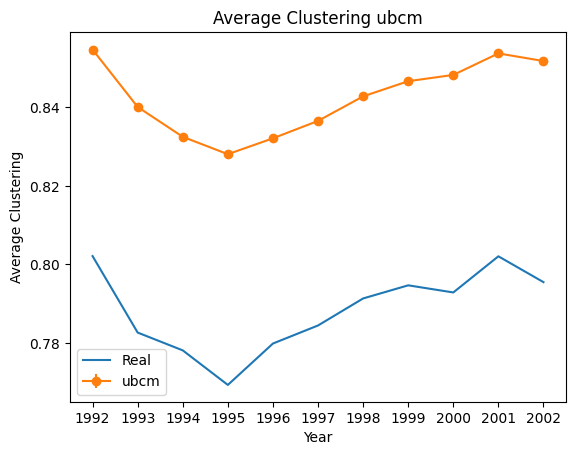

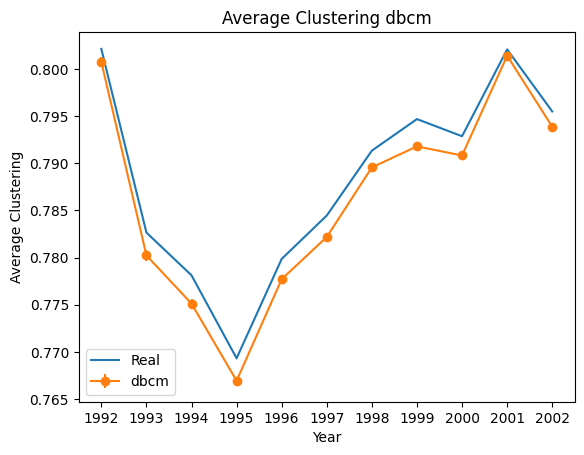

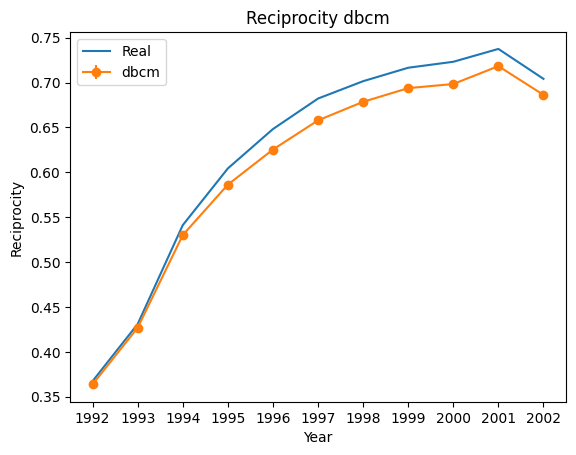

In [40]:

# ubcm
plot("Average Clustering", "ubcm", ave_clust, ave_clust_ubcm, std_err_clust_ubcm)
# dbcm - clust
plot("Average Clustering", "dbcm", ave_clust, ave_clust_dbcm, std_err_clust_dbcm)
# dbcm - reci
plot("Reciprocity", "dbcm", reci_coe, ave_reci_dbcm, std_err_reci_dbcm)

A06.2 - Weighted ERGMs

Task: Repeat the analysis of point 1 with weighted networks

+ measure strength assortativity coefficient on the data

+ fit the Undirected Enhanced CM and Directed Enhanced CM using the CReMa method

+ sample 30 networks from the obtained distributions and measure strength assortativity. Calculate average and std dev

+ plot strength assortativity as a function of time, comparing the real value with the average and error bars from samples

+ DECM: plot all pairs of assortativity (in-in, in-out, out-out)

In [41]:
# Step 1
#Step 1: Average clustering and reciprocity
year_load = 1992
asso_u = []
asso_in_in = []
asso_in_out = []
asso_out_out = []

for graph in graphs:
    print("-------------Year of " + str(year_load) + "-------------")
    asso_u.append(nx.degree_pearson_correlation_coefficient(graph.to_undirected(), weight="weight"))
    print("Strength assortativity coefficient(undirected): " + str(nx.degree_pearson_correlation_coefficient(graph.to_undirected(), weight="weight")))
    asso_in_in.append(nx.degree_pearson_correlation_coefficient(graph, x="in", y="in", weight="weight"))
    print("Strength assortativity coefficient(in-in): " + str(nx.degree_pearson_correlation_coefficient(graph, x="in", y="in",weight="weight")))
    asso_in_out.append(nx.degree_pearson_correlation_coefficient(graph, x="in", y="out",weight="weight"))
    print("Strength assortativity coefficient(in-out): " + str(nx.degree_pearson_correlation_coefficient(graph, x="in", y="out",weight="weight")))
    asso_out_out.append(nx.degree_pearson_correlation_coefficient(graph, x="out", y="out",weight="weight"))
    print("Strength assortativity coefficient(out-out): " + str(nx.degree_pearson_correlation_coefficient(graph, x="out", y="out",weight="weight")))
    year_load = year_load + 1

-------------Year of 1992-------------
Strength assortativity coefficient(undirected): -0.09198245960589028
Strength assortativity coefficient(in-in): -0.04868776409103517
Strength assortativity coefficient(in-out): -0.04664740434092362
Strength assortativity coefficient(out-out): -0.05760318920541303
-------------Year of 1993-------------
Strength assortativity coefficient(undirected): -0.1006865211648856
Strength assortativity coefficient(in-in): -0.06537929984058079
Strength assortativity coefficient(in-out): -0.062189867187615884
Strength assortativity coefficient(out-out): -0.06910618411247685
-------------Year of 1994-------------
Strength assortativity coefficient(undirected): -0.09858944774811934
Strength assortativity coefficient(in-in): -0.07868988970611855
Strength assortativity coefficient(in-out): -0.07622523439269688
Strength assortativity coefficient(out-out): -0.07800143058821345
-------------Year of 1995-------------
Strength assortativity coefficient(undirected): -0.0

In [42]:
# Step 2&3
# This time calculate deum & uecm in one for loop
year_load = 1992
def asso_coe_uecm():
    asso = []

    for i in range(30):
        edgelist_ens = np.loadtxt(f"uecm_sample/{i}.txt")
        ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                        is_directed = False,
                                        is_sparse = False,
                                        is_weighted = True)

        # and generate a networkx graph from it
        G = nx.from_numpy_array(ens_adj)
        asso.append(nx.degree_pearson_correlation_coefficient(G, weight="weight"))
    
    return asso

def asso_coe_decm():
    assoinin = []
    assoinout = []
    assooutout = []

    for i in range(30):
        edgelist_ens = np.loadtxt(f"decm_sample/{i}.txt")
        ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                        is_directed = True,
                                        is_sparse = False,
                                        is_weighted = True)

        # and generate a networkx graph from it
        G = nx.from_numpy_array(ens_adj, create_using= nx.DiGraph())
        assoinin.append(nx.degree_pearson_correlation_coefficient(G, x="in",y="in",weight="weight"))
        assoinout.append(nx.degree_pearson_correlation_coefficient(G, x="in",y="out",weight="weight"))
        assooutout.append(nx.degree_pearson_correlation_coefficient(G, x="out",y="out",weight="weight"))

    return assoinin, assoinout, assooutout
        

ave_asso_uecm = []
std_dev_asso_uecm = []
ave_assoinin_decm = []
ave_assoinout_decm = []
ave_assooutout_decm = []
std_dev_assoinin_decm = []
std_dev_assoinout_decm = []
std_dev_assooutout_decm = []

for graph in graphs:
    print("-------------Year of " + str(year_load) + "-------------")
    # then we convert it to numpy adjacency matrix
    uecm_adj_wdn = nx.to_numpy_array(graph.to_undirected())
    decm_adj_wdn = nx.to_numpy_array(graph)

    # and we initialize a NEMtropy UndirectedGraph object/directed
    uecm_graph = UndirectedGraph(ubcm_adj_wdn)
    decm_graph = DirectedGraph(dbcm_adj_wdn)

    # then we need to solve the maximum likelihood problem for the model of our choice
    # model choices for UndirectedGraph are "cm_exp", "ecm_exp" 
    # and "crema" which is a faster implementation of "ecm_exp"
    # don't worry about warnings, it's normal

    uecm_graph.solve_tool(model="crema", method="newton",
                 initial_guess="random",
                 adjacency="cm_exp",
                 method_adjacency="newton")
    decm_graph.solve_tool(model="crema", method="newton",
                 initial_guess="random",
                 adjacency="dcm_exp",
                 method_adjacency="newton")

    #sample 30 networks from the obtained distributions and 

    uecm_graph.ensemble_sampler(30, cpu_n=1, output_dir="uecm_sample/")
    decm_graph.ensemble_sampler(30, cpu_n=1, output_dir="decm_sample/")

    # measure clustering and reciprocity.
    asso_uecm = []
    std_err_asso_uecm = []
    assoinin_decm = []
    assoinout_decm = []
    assooutout_decm = []
    asso_uecm = asso_coe_uecm()
    assoinin_decm, assoinout_decm, assooutout_decm = asso_coe_decm()
    
    # Calculate average and standard error on each measure
    ave_asso_uecm.append(np.average(asso_uecm))
    std_dev_asso_uecm.append(np.std(asso_uecm))

    ave_assoinin_decm.append(np.average(assoinin_decm))
    ave_assoinout_decm.append(np.average(assoinout_decm))
    ave_assooutout_decm.append(np.average(assooutout_decm))
    std_dev_assoinin_decm.append(np.std(assoinin_decm))
    std_dev_assoinout_decm.append(np.std(assoinout_decm))
    std_dev_assooutout_decm.append(np.std(assooutout_decm))

    year_load = year_load + 1
     

-------------Year of 1992-------------


/opt/homebrew/lib/python3.10/site-packages/numba/core/utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",



solution error = 506080103500.5236

solution error = 592660891028.167
-------------Year of 1993-------------

solution error = 505790307209.65814

solution error = 592928486655.3353
-------------Year of 1994-------------

solution error = 4201328666428.1445

solution error = 592926194795.4341
-------------Year of 1995-------------

solution error = 506936144141.9209

solution error = 592061057661.6923
-------------Year of 1996-------------

solution error = 506696601540.11615

solution error = 593215171869.5398
-------------Year of 1997-------------

solution error = 506505222697.3918

solution error = 593074426749.5754
-------------Year of 1998-------------

solution error = 506246666321.35535

solution error = 593162327075.5073
-------------Year of 1999-------------

solution error = 466281697474.7144

solution error = 593215171732.0963
-------------Year of 2000-------------

solution error = 506845512178.13513

solution error = 593154460373.3008
-------------Year of 2001-----------

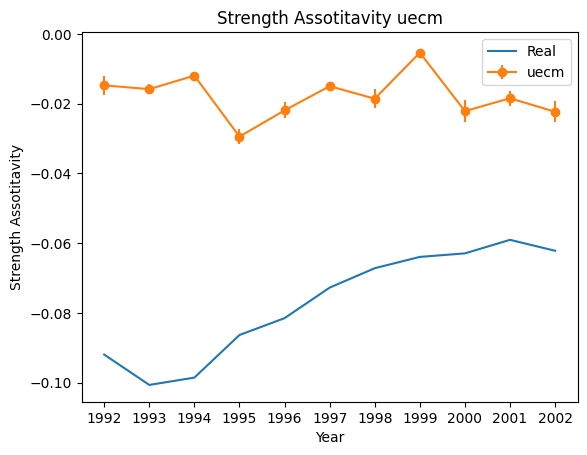

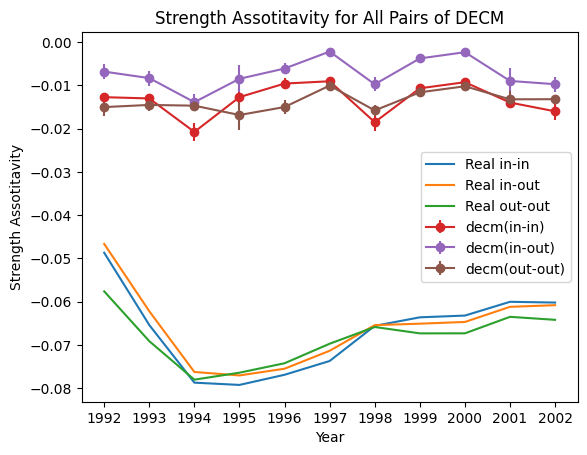

In [43]:
# Step 4
plot("Strength Assotitavity", "uecm", asso_u, ave_asso_uecm, std_dev_asso_uecm)
plt.plot(years, asso_in_in, label="Real in-in")
plt.plot(years, asso_in_out, label="Real in-out")
plt.plot(years, asso_out_out, label="Real out-out")
#plt.plot(years, ave_assoinin_decm,label="decm(in-in)")
#plt.plot(years, ave_assoinout_decm,label="decm(in-out)")
#plt.plot(years, ave_assooutout_decm,label="decm(out-out)")
plt.errorbar(years, ave_assoinin_decm, std_dev_assoinin_decm, fmt='-o', label="decm(in-in)")
plt.errorbar(years, ave_assoinout_decm, std_dev_assoinout_decm, fmt='-o',label="decm(in-out)")
plt.errorbar(years, ave_assooutout_decm, std_dev_assooutout_decm, fmt='-o',label="decm(out-out)")
plt.title("Strength Assotitavity for All Pairs of DECM")
plt.ylabel("Strength Assotitavity")
plt.xlabel("Year")
plt.legend()
plt.show()
# plot("Strength Assotitavity", "decm(in-in)", asso_in_in, ave_assoinin_decm, std_dev_assoinin_dbcm)
# plot("Strength Assotitavity", "decm(in-out)", asso_in_out, ave_assoinout_decm, std_dev_assoinout_dbcm)
# plot("Strength Assotitavity", "decm(out-out)", asso_out_out, ave_assooutout_decm, std_dev_assooutout_dbcm)

A06.3

Task: write a short paragraph to draw conclusions about the structure of the World Trade Web based on the ERGM inferential approach

You should include at least the following points:

+ Comment on the interpretation of the clustering and reciprocity coefficients found in the original data

+ Comment on the interpretation of strength assortativity for this dataset

+ Comment on the conclusions you can draw via the inference of the UBCM, DBCM and DECM models

ANSWER:

For the original data, the average clustering coefficient is relatively high (0.77-0.80) which is similar to the trend of DBCM and smaller then UBCM. Reciprocity is in a trend of increasing and similar to the trend of DBCM. In this network, it implies the high cooperation on trade in groups. Increasing recprocity implies an increasing mutual relationship between countries and economic ties between countries continually grow stronger.

The strength assortativity decreases from -0.045 to -0.08 between 1992 and 1994. Then it increases gradually after 1994. Maybe unstable international environment causes this (like Gulf War, fall of USSR, etc.). Later the world got recovered from it.

DBCM fits well, while UBCM and DECM deviates from the real a lot which do not fit well.